In [1]:
import redback
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt
import corner
from bilby.core.prior import Constraint, PriorDict, Uniform, Sine
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

No module named 'lalsimulation'
lalsimulation is not installed. Some EOS based models will not work. Please use bilby eos or pass your own EOS generation class to the model


In [2]:
bands = ['lsstg', 'lsstr', 'lssti','lsstz','lssty', 'lsstu', 'uvot::uvw1']
frequencies=[5e9, 2e17]
bandfreqs = (redback.utils.bands_to_frequency(bands))
frequencies.extend(bandfreqs)
frequencies.sort()
frequencies

[5000000000.0,
 308738116672272.25,
 344949774531146.6,
 397287890568202.3,
 481730482385753.06,
 621093082892117.8,
 816711949886849.0,
 1146839759677006.2,
 2e+17]

In [3]:
that_priors = redback.priors.get_priors(model='tophat')
that_priors['p']=  2.3
that_priors['loge0']= Uniform(minimum=48, maximum=52, name='loge0', latex_label='$\\log_{10}E_{0}$', unit=None, boundary=None)
that_priors['redshift']= 0.01
that_priors['logepse']= -1.25
that_priors['logepsb']= -2.5
that_priors['ksin']= 1.0
that_priors['g0']= 1000
that_priors['logn0']=Uniform(minimum=-1.5, maximum=1.5, name='logn0', latex_label='$\\log_{10}n_{\\mathrm{ism}}$', unit=None, boundary=None)
sample=that_priors.sample(1)


In [12]:
def afterglowoff(time, frequency):
    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='tophat',  thv= 0.8, loge0=50.0 , thc= 0.06, logn0=0.35, p=2.3, logepse=-1.25, logepsb=-2.5, ksin=1, g0=1000, thw=3,
        beta=4, output_format='flux_density', frequency=frequency)
    return ag_fluxd

def afterglowon(time, frequency):
    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, redshift=0.01, av=0.5,
        base_model='tophat',  thv= 0.14, loge0=47.7 , thc= 0.06, logn0=0.53, p=2.3, logepse=-1.25, logepsb=-2.5, ksin=1, g0=1000, thw=3,
        beta=4, output_format='flux_density', frequency=frequency)
    return ag_fluxd

def sampled(time,frequency):
    sample=that_priors.sample(1)
    ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, av=0.5,
        base_model='tophat', output_format='flux_density', frequency=frequency, **sample)
    
    if time[np.argmax(ag_fluxd)]<= 0.1 and ag_fluxd.all() > 10e-18:
        sample=that_priors.sample(1)
        ag_fluxd = redback.transient_models.extinction_models.extinction_with_afterglow_base_model(time=time, av=0.5,
            base_model='tophat', **sample, output_format='flux_density', frequency=frequency)
    else:
        return ag_fluxd



ValueError: x, y, and format string must not be None

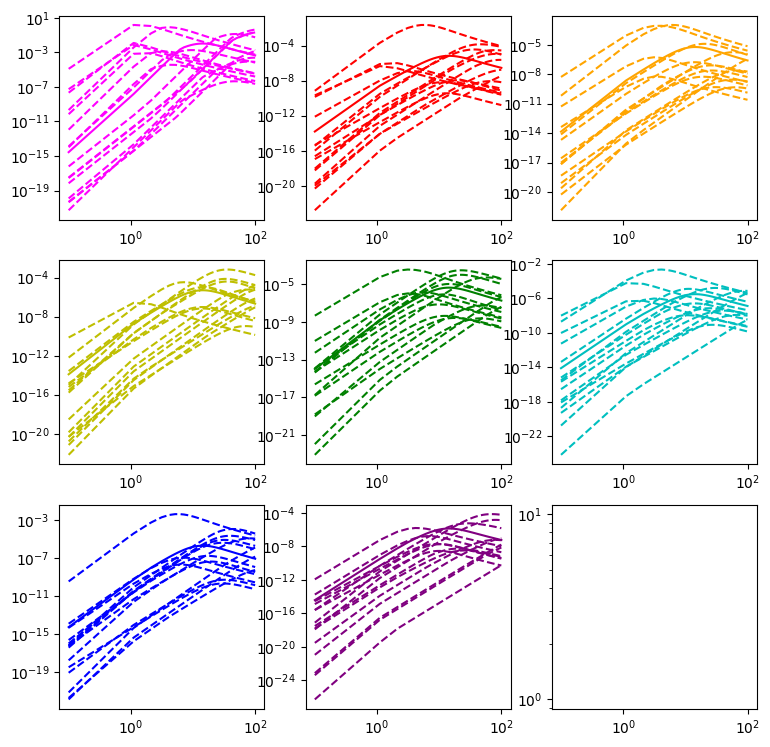

In [15]:
time= np.linspace(0.1,100,100)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))

ax[0,0].loglog(time, afterglowoff(time, frequencies[0]), c='magenta')
ax[0,1].loglog(time, afterglowoff(time, frequencies[1]), c='r')
ax[0,2].loglog(time, afterglowoff(time, frequencies[2]), c='orange')
ax[1,0].loglog(time, afterglowoff(time, frequencies[3]), c='y')
ax[1,1].loglog(time, afterglowoff(time, frequencies[4]), c='g')
ax[1,2].loglog(time, afterglowoff(time, frequencies[5]), c='c')
ax[2,0].loglog(time, afterglowoff(time, frequencies[6]), c='b')
ax[2,1].loglog(time, afterglowoff(time, frequencies[7]), c='purple')
ax[2,2].loglog(time, afterglowoff(time, frequencies[8]), c='k')

for i in range(20):
    ax[0,0].loglog(time, sampled(time, frequencies[0]), c='magenta', ls='--')
    ax[0,1].loglog(time, sampled(time, frequencies[1]), c='r', ls='--')
    ax[0,2].loglog(time, sampled(time, frequencies[2]), c='orange', ls='--')
    ax[1,0].loglog(time, sampled(time, frequencies[3]), c='y', ls='--')
    ax[1,1].loglog(time, sampled(time, frequencies[4]), c='g', ls='--')
    ax[1,2].loglog(time, sampled(time, frequencies[5]), c='c', ls='--')
    ax[2,0].loglog(time, sampled(time, frequencies[6]), c='b', ls='--')
    ax[2,1].loglog(time, sampled(time, frequencies[7]), c='purple', ls='--')    
    #ax[2,2].plot(time, sampled(time, frequencies[8]), c='k', ls='--')


f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
fix = Line2D([0],[0],color='grey', ls='solid', label='fixed params')
samp = Line2D([0],[0],color='grey', ls='dashed',label='sampled')
plt.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9,fix,samp], loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()

ax[0,0].plot(time, sampled(time, frequencies[0]), c='magenta', ls='--')
ax[0,1].plot(time, sampled(time, frequencies[1]), c='r', ls='--')
ax[0,2].plot(time, sampled(time, frequencies[2]), c='orange', ls='--')
ax[1,0].plot(time, sampled(time, frequencies[3]), c='y', ls='--')
ax[1,1].plot(time, sampled(time, frequencies[4]), c='g', ls='--')
ax[1,2].plot(time, sampled(time, frequencies[5]), c='c', ls='--')
ax[2,0].plot(time, sampled(time, frequencies[6]), c='b', ls='--')
ax[2,1].plot(time, sampled(time, frequencies[7]), c='purple', ls='--')
ax[2,2].plot(time, sampled(time, frequencies[8]), c='k', ls='--')


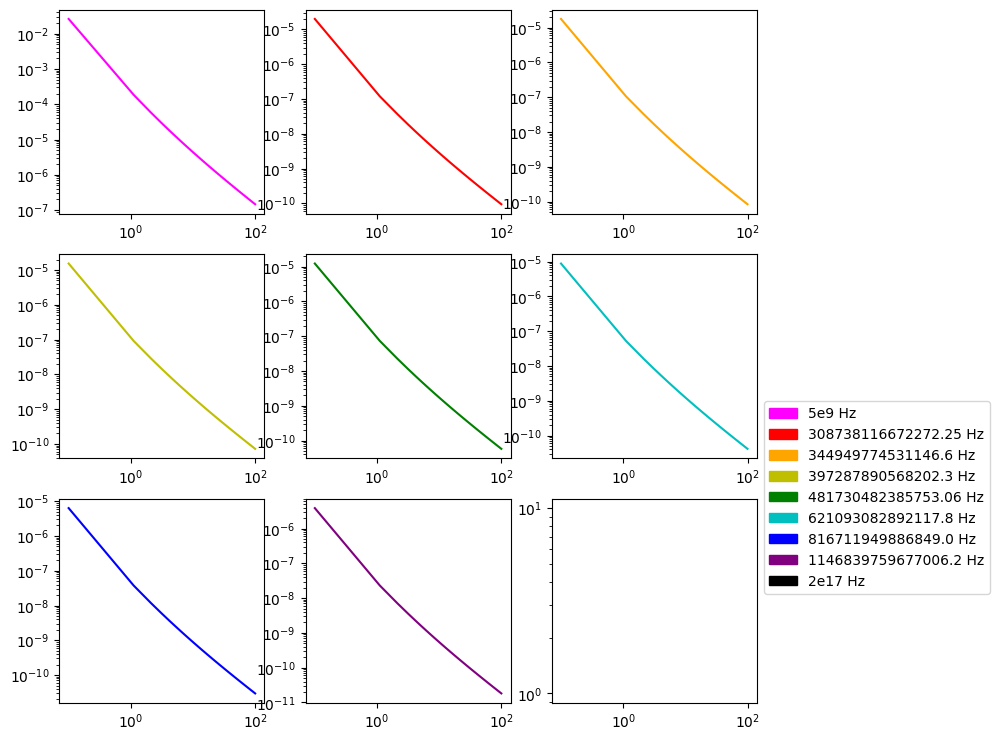

In [6]:
time= np.linspace(0.1,100,100)

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(9,9))

ax[0,0].loglog(time, afterglowon(time, frequencies[0]), c='magenta')
ax[0,1].loglog(time, afterglowon(time, frequencies[1]), c='r')
ax[0,2].loglog(time, afterglowon(time, frequencies[2]), c='orange')
ax[1,0].loglog(time, afterglowon(time, frequencies[3]), c='y')
ax[1,1].loglog(time, afterglowon(time, frequencies[4]), c='g')
ax[1,2].loglog(time, afterglowon(time, frequencies[5]), c='c')
ax[2,0].loglog(time, afterglowon(time, frequencies[6]), c='b')
ax[2,1].loglog(time, afterglowon(time, frequencies[7]), c='purple')
ax[2,2].loglog(time, afterglowon(time, frequencies[8]), c='k')


f1 = mpatches.Patch(color='magenta', label='5e9 Hz')
f2 = mpatches.Patch(color='r', label='308738116672272.25 Hz')
f3 = mpatches.Patch(color='orange', label='344949774531146.6 Hz')
f4 = mpatches.Patch(color='y', label='397287890568202.3 Hz')
f5 = mpatches.Patch(color='g', label='481730482385753.06 Hz')
f6 = mpatches.Patch(color='c', label='621093082892117.8 Hz')
f7 = mpatches.Patch(color='b', label='816711949886849.0 Hz')
f8 = mpatches.Patch(color='purple', label='1146839759677006.2 Hz')
f9 = mpatches.Patch(color='k', label='2e17 Hz')
#fix = Line2D([0],[0],color='grey', ls='solid', label='fixed params')
#samp = Line2D([0],[0],color='grey', ls='dashed',label='sampled')
plt.legend(handles=[f1,f2,f3,f4,f5,f6,f7,f8,f9], loc='lower left', bbox_to_anchor=(1, 0.5))
plt.show()